In [19]:
import pyvisa
from nanodrivers.visa_drivers.anapico import ANAPICO
from nanodrivers.visa_drivers.dc import DC
from nanodrivers.visa_drivers.vna import VNA
from nanodrivers.visa_drivers.signal_analyser import Anri
# from nanodrivers.visa_drivers.signal_analizar import Anri

#math
import numpy as np
from numpy import *
from scipy.optimize import curve_fit

#plotting
import matplotlib.pyplot as plt
import matplotlib

#matlab import
import scipy.io
from scipy.io import savemat
from scipy.optimize import minimize

#file_store
import os

#time
import time
from datetime import datetime, timedelta

from ctypes import *
%matplotlib inline

Global_data_adress = r"C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA"
exp_name = 'CoSi_2'
adress = Global_data_adress+'\\'+exp_name
if not os.path.exists(adress):
  os.mkdir(adress)
  print("Folder %s created!" % adress)
else:
  print("Folder %s already exists" % adress)

Folder C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\CoSi_2 already exists


In [20]:
path = adress +'\\'+ 'Scan_after_cooldown_02_05_24'
if not os.path.exists(path):
  os.mkdir(path)
  print("Folder %s created!" % path)
else:
  print("Folder %s already exists" % path)

Folder C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\CoSi_2\Scan_after_cooldown_02_05_24 already exists


In [5]:
vna = VNA()
vna.idn()

Connection exist: Rohde-Schwarz,ZNB20-2Port,1311601062102129,3.45



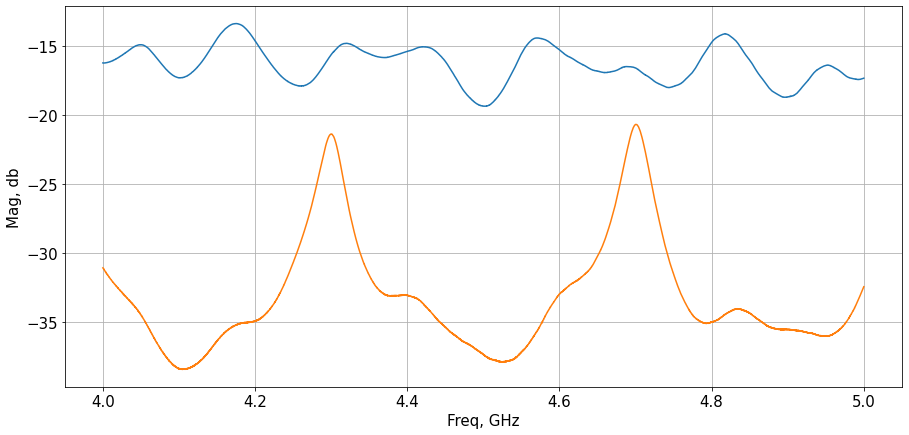

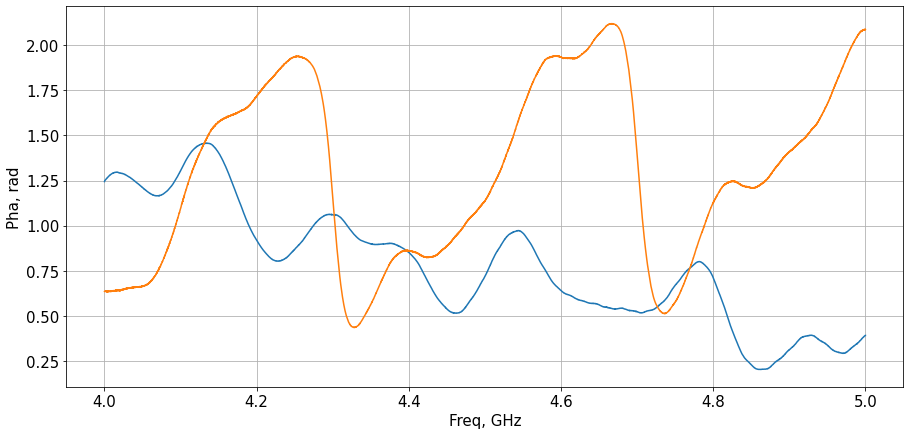

In [27]:
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize = (15, 7))
ax.grid()
ax.set_xlabel('Freq, GHz')
ax.set_ylabel('Mag, db')

ax.plot(freq_new/1e9, mag_new)
ax.plot(freq/1e9, mag)

fig, ax = plt.subplots(figsize = (15, 7))
ax.grid()
ax.set_xlabel('Freq, GHz')
ax.set_ylabel('Pha, rad')
ax.plot(freq_new/1e9, pha_new)
ax.plot(freq/1e9, pha)

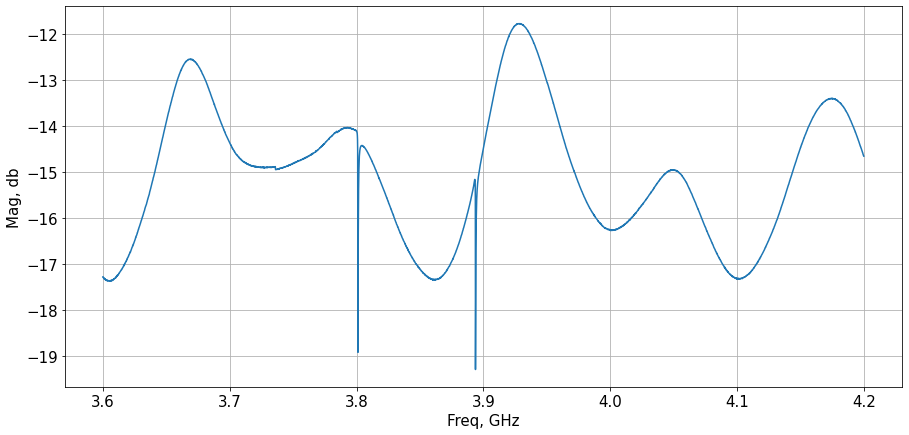

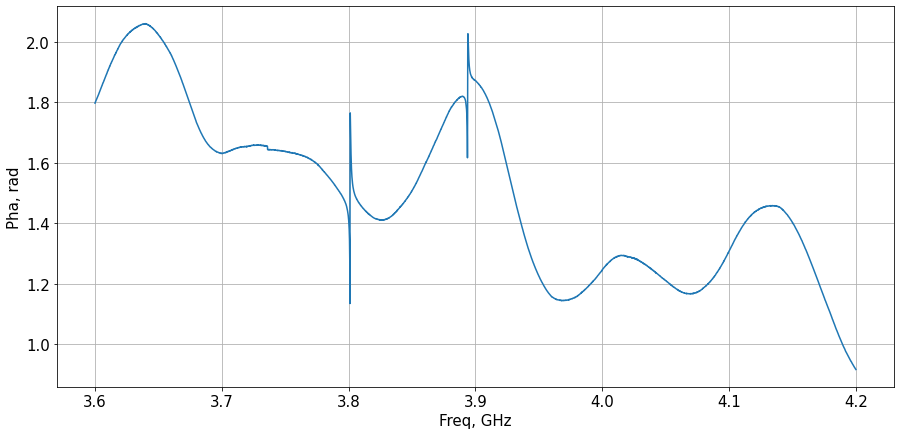

In [28]:
%matplotlib inline
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize = (15, 7))
ax.grid()
ax.set_xlabel('Freq, GHz')
ax.set_ylabel('Mag, db')

vna.set_band(1000)
vna.set_nop(5000)
vna.set_power(0)
vna.set_freq_start_stop(3.6e9, 4.2e9, vna.get_nop())
mag_new, pha_new, freq_new = vna.get_data(True)
ax.plot(freq_new/1e9, mag_new)

fig, ax = plt.subplots(figsize = (15, 7))
ax.grid()
ax.set_xlabel('Freq, GHz')
ax.set_ylabel('Pha, rad')
ax.plot(freq_new/1e9, pha_new)

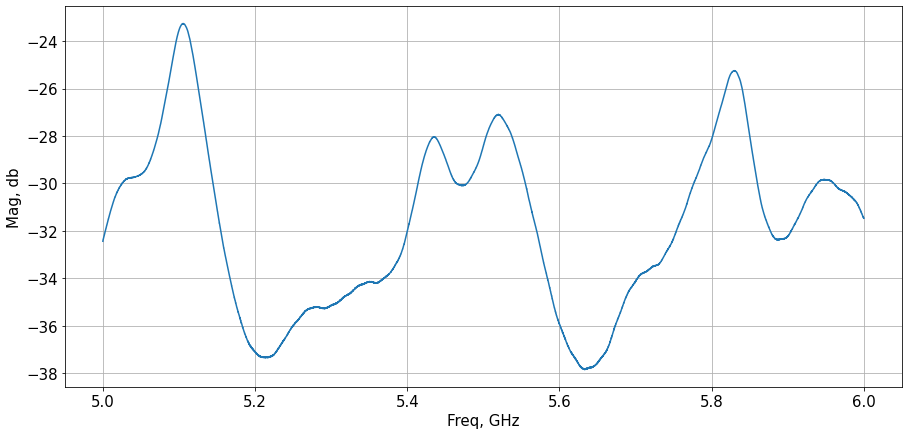

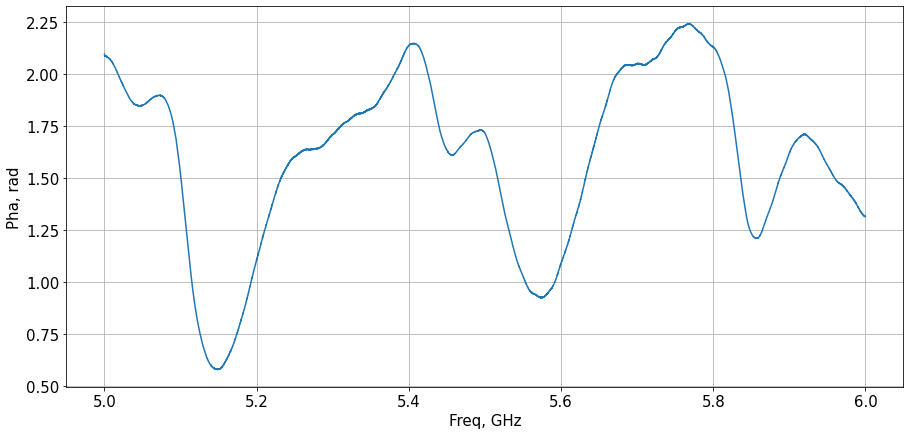

In [17]:
%matplotlib inline
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize = (15, 7))
ax.grid()
ax.set_xlabel('Freq, GHz')
ax.set_ylabel('Mag, db')

vna.set_band(100)
vna.set_nop(10000)
vna.set_power(0)
vna.set_freq_start_stop(5e9, 6e9, vna.get_nop())
mag, pha, freq = vna.get_data(True)
ax.plot(freq/1e9, mag)

fig, ax = plt.subplots(figsize = (15, 7))
ax.grid()
ax.set_xlabel('Freq, GHz')
ax.set_ylabel('Pha, rad')
ax.plot(freq/1e9, pha)

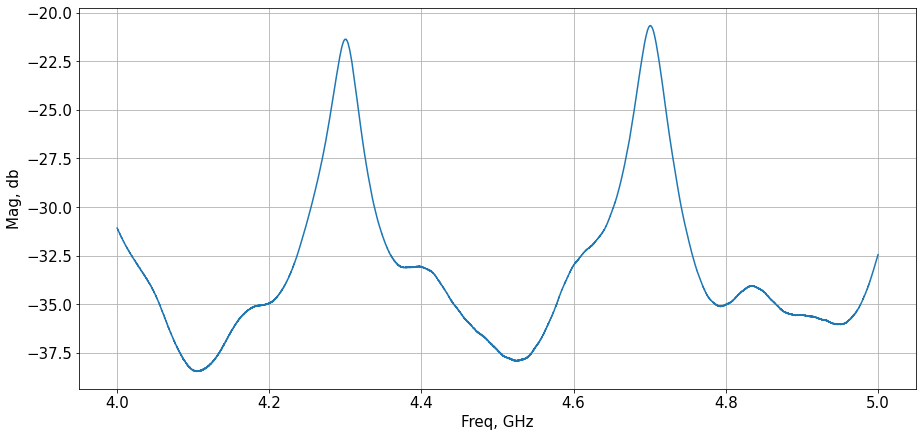

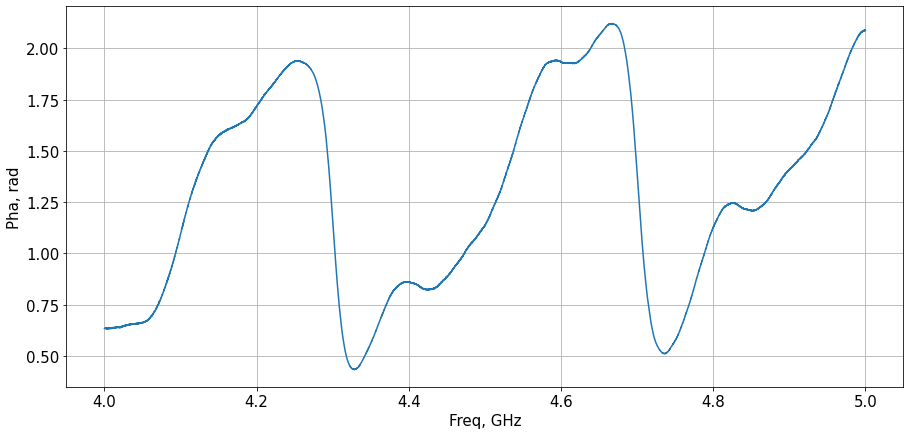

In [18]:
%matplotlib inline
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize = (15, 7))
ax.grid()
ax.set_xlabel('Freq, GHz')
ax.set_ylabel('Mag, db')

vna.set_band(100)
vna.set_nop(10000)
vna.set_power(0)
vna.set_freq_start_stop(4e9, 5e9, vna.get_nop())
mag, pha, freq = vna.get_data(True)
ax.plot(freq/1e9, mag)

fig, ax = plt.subplots(figsize = (15, 7))
ax.grid()
ax.set_xlabel('Freq, GHz')
ax.set_ylabel('Pha, rad')
ax.plot(freq/1e9, pha)

In [7]:
start_time = datetime.now()
file = r'full_line_scan_'+ start_time.strftime(r'%Y-%m-%d-%H-%M-%S') + '.mat'
file_name = path +'\\' + file

state = dict()
state['freqs'] = freq
state['mag'] = mag
state['pha'] = pha
state['vna'] = vna.dump

state['temp'] = 12

savemat(file_name, state)